# Exploratory Data Analysis

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# Install the missingno library
! pip install missingno

In [3]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv("datasets/titanic.csv")

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Handling missing values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

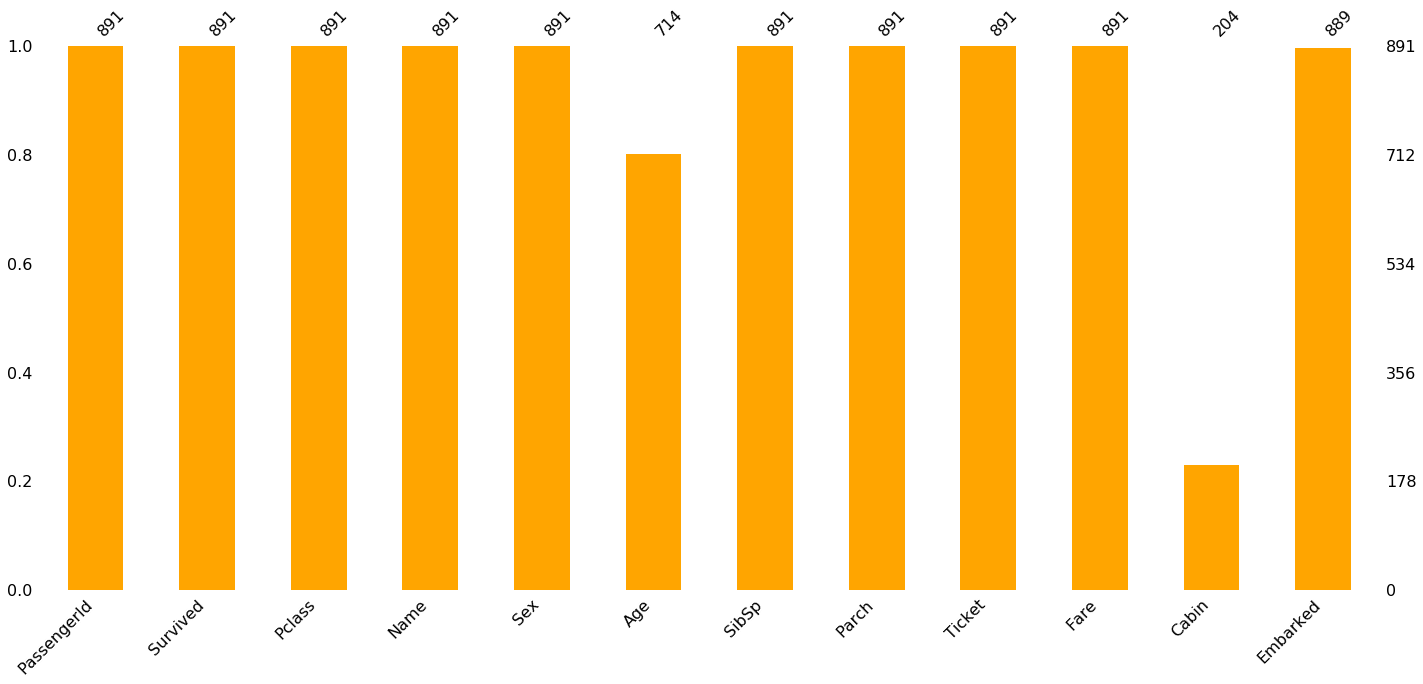

In [10]:
import missingno as ms

ms.bar(df, color="orange", inline=True)

* ### PassengerId: Just a serial number 
* ### Survived: 0 = No, 1 = Yes
* ### pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* ### sibsp: # of siblings / spouses aboard the Titanic
* ### parch: # of parents / children aboard the Titanic
* ### ticket: Ticket number
* ### cabin: Cabin number
* ### embarked: Port of Embarkation C = Cherbourg,
 ### Q = Queenstown, S = Southampton

In [11]:
df.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [12]:
df.groupby(["Pclass", "Sex"])["Age"].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [13]:
# Fillin the age values for  Pclass =1 for male  and  Female
df.loc[df.Age.isnull() & (df.Sex == "male") & (df.Pclass == 1), "Age"] = 37
df.loc[df.Age.isnull() & (df.Sex == "female") & (df.Pclass == 1), "Age"] = 35.5

# Fillin the age values for  Pclass =2 for male  and  Female
df.loc[df.Age.isnull() & (df.Sex == "male") & (df.Pclass == 2), "Age"] = 29.0
df.loc[df.Age.isnull() & (df.Sex == "female") & (df.Pclass == 2), "Age"] = 28.5

# Fillin the age values for  Pclass =2 for male  and  Female
df.loc[df.Age.isnull() & (df.Sex == "male") & (df.Pclass == 3), "Age"] = 25
df.loc[df.Age.isnull() & (df.Sex == "female") & (df.Pclass == 3), "Age"] = 22

In [14]:
df.drop(columns="Cabin", inplace=True)

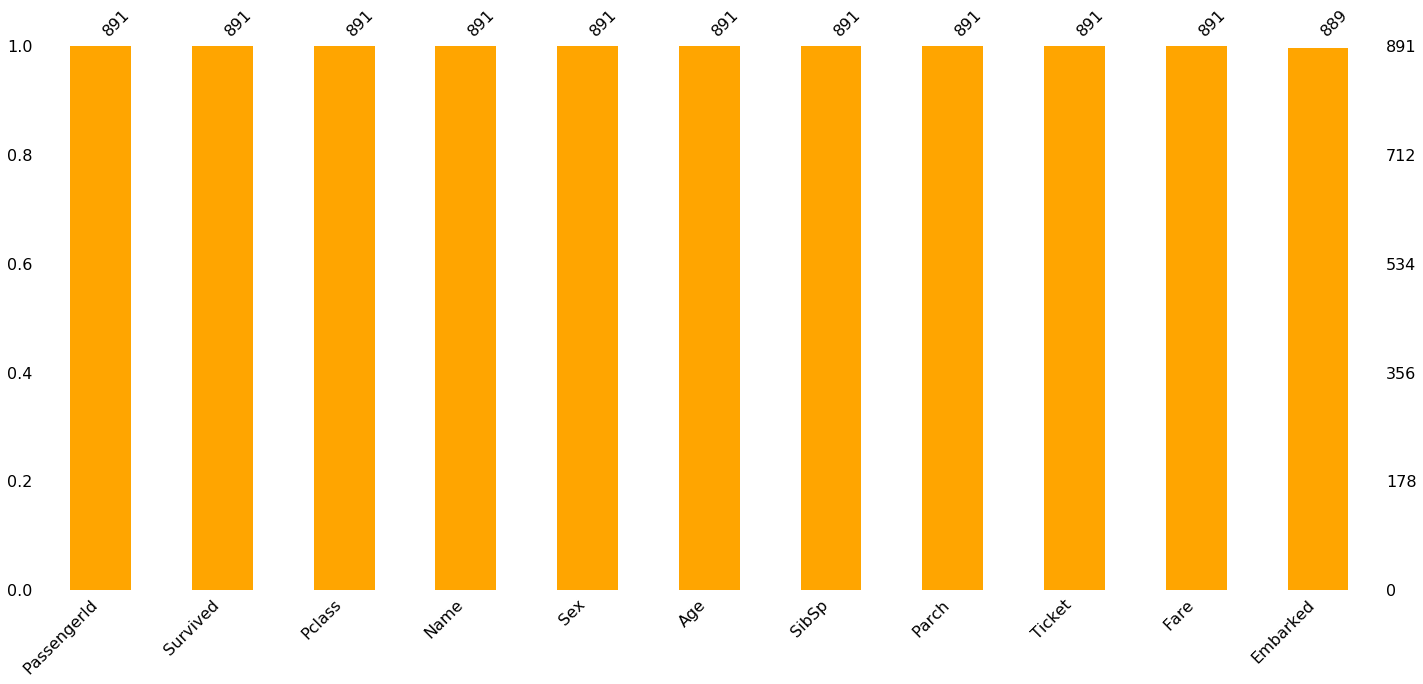

In [15]:
import missingno as ms

ms.bar(df, color="orange", inline=True)

* ### PassengerId: Just a serial number 
* ### Survived: 0 = No, 1 = Yes
* ### pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* ### sibsp: # of siblings / spouses aboard the Titanic
* ### parch: # of parents / children aboard the Titanic
* ### ticket: Ticket number
* ### cabin: Cabin number
* ### embarked: Port of Embarkation C = Cherbourg,
 ### Q = Queenstown, S = Southampton

## Types of variables

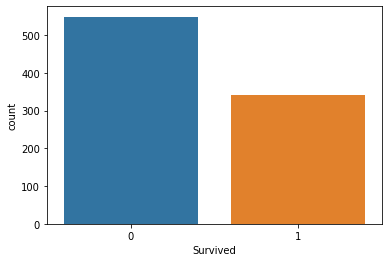

In [16]:
sns.countplot(x="Survived", data=df)

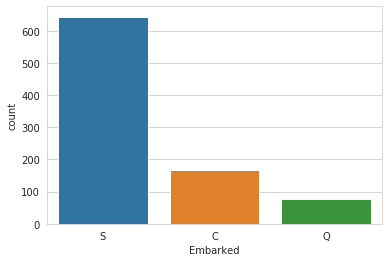

In [17]:
sns.set_style("whitegrid")
sns.countplot(x="Embarked", data=df)

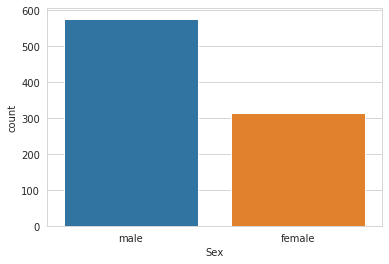

In [18]:
sns.countplot(x="Sex", data=df)

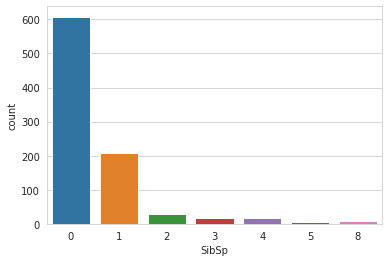

In [19]:
sns.countplot(x="SibSp", data=df)

# Bivariate Analysis

### Scatter plot

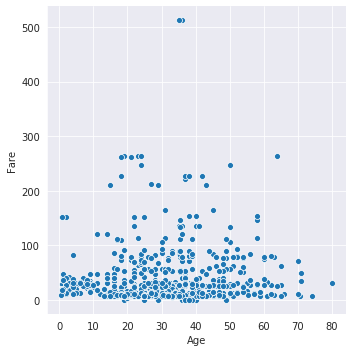

In [20]:
sns.set_style("darkgrid")
sns.relplot("Age", "Fare", data=df)

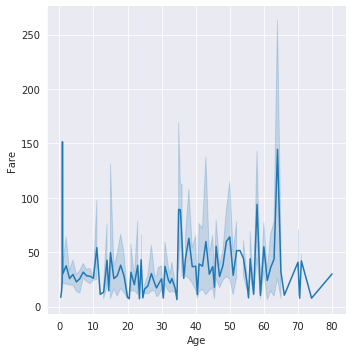

In [21]:
sns.relplot("Age", "Fare", kind="line", data=df)

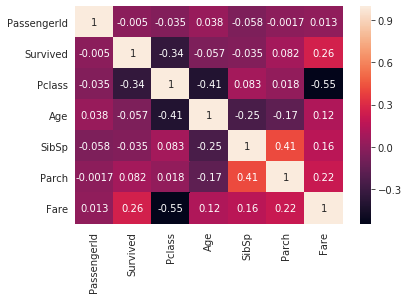

In [22]:
corr = df.corr()
sns.heatmap(corr, annot=True)

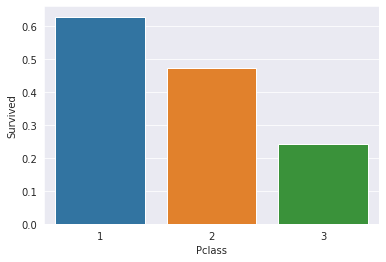

In [23]:
sns.barplot(x="Pclass", y="Survived", data=df, ci=None)

# Multivariate Analysis

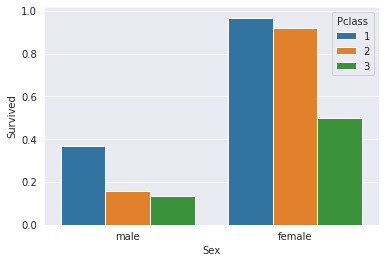

In [24]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, ci=None)

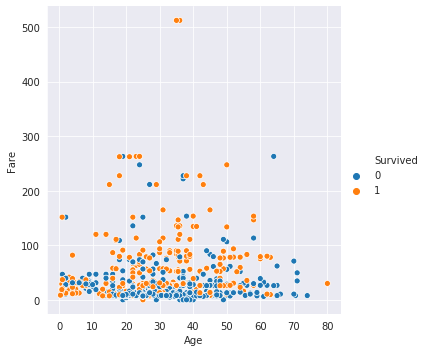

In [25]:
sns.set_style("darkgrid")
sns.relplot(x="Age", y="Fare", hue="Survived", data=df)

## Handling outliers

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
df = pd.read_csv("datasets/pizza_prices.csv")

In [28]:
df.head()

,city,country,price
0,Sherwood,US,11.2
1,Phoenix,US,12.3
2,Cincinnati,US,10.3
3,Madison Heights,US,11.7
4,Baltimore,US,12.6


In [29]:
len(df)

18

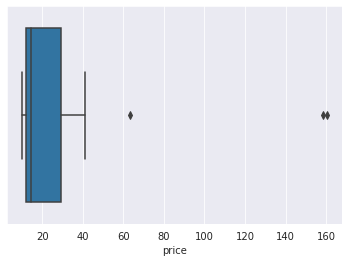

In [30]:
sns.boxplot("price", data=df)

In [31]:
np.mean(df.price)

35.123888888888885

In [32]:
df.drop(df[df.price == 160.32].index, inplace=True)
df.drop(df[df.price == 63.43].index, inplace=True)
df.drop(df[df.price == 158.38].index, inplace=True)

In [33]:
np.mean(df.price)

16.673333333333336

## Feature Selection

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
df = pd.read_csv("datasets/titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
df_main = df.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [36]:
df_main.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
df_main["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [38]:
df_main["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df_main.loc[df_main["Sex"] == "male", "Sex"] = 1
df_main.loc[df_main["Sex"] == "female", "Sex"] = 0
df_main.loc[df_main["Embarked"] == "S", "Embarked"] = 0
df_main.loc[df_main["Embarked"] == "Q", "Embarked"] = 1
df_main.loc[df_main["Embarked"] == "C", "Embarked"] = 2

In [40]:
df_main.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [41]:
X = df_main.drop(columns="Survived")

In [42]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [43]:
y = df["Survived"]

In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64